In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter as cntr
import operator
from collections import defaultdict
import sys
from queue import PriorityQueue
import time
import copy

# 1

In [4]:
inp = open("input1.txt", "r+")
inp = inp.read()
inp = np.array(inp.split("\n")).astype("int")

FileNotFoundError: [Errno 2] No such file or directory: 'input1.txt'

In [34]:
## a

In [29]:
shift = np.roll(inp, 1)

In [32]:
sum(inp > shift) # first one should be nan but doesnt matter since its big

1713

In [35]:
##b 

In [51]:
sliding = []
for x in range(len(inp)):
     sliding.append(inp[x:x+3])
sliding = np.array(sliding[:-2])

In [57]:
a = np.sum(sliding,axis=1)
b =  np.roll(a, 1)

In [59]:
sum(a > b)

1734

# 2

In [4]:
inp = open("inputs/input2.txt", "r+")
inp = inp.read()
inp = np.array(inp.split("\n"))

In [9]:
#a
counter = {}
counter["forward"] = 0
counter["down"] = 0
counter["up"] = 0

for x in inp:
    a = x.split(" ")
    counter[a[0]] += int(a[1])
print(counter["forward"] * (counter["down"] - counter["up"]))

1561344


In [12]:
#b
counter = {}
counter["aim"] = 0
counter["hor"] = 0
counter["depth"] = 0

for x in inp:
    a = x.split(" ")
    if a[0] == "down":
        counter["aim"] += int(a[1])
    
    elif a[0] == "up":
        counter["aim"] -= int(a[1])
    
    elif a[0] == "forward":
        counter["hor"] += int(a[1])
        counter["depth"] += int(a[1]) * counter["aim"]
    else:
        print("broken")
print(counter["hor"] * counter["depth"])

1848454425


# 3

In [270]:
inp = open("inputs/input3.txt", "r+")
inp = inp.read()
inp = inp.split("\n")
splitted = []
for x in range(len(inp)): 
    splitted.append([char for char in inp[x]])
inp = np.array(splitted).astype("int")

In [271]:
#a

In [272]:
a = (np.sum(inp,axis=0) > (len(inp) // 2)).astype(int)
b = 1-a

In [273]:
a = int("".join(list(a.astype("str"))),2)
b = int("".join(list(b.astype("str"))),2)

In [274]:
a * b

3148794

In [275]:
#b

In [280]:
def check(inp,up=True):
    save = []
    current = 0
    start = inp.T
    for x in range(12):
        print(start.shape)
        if up == True: 
            if (len(start[current]) % 2) == 0:
                condition = sum(start[current]) >= (len(start[current])//2)
            else:
                condition = sum(start[current]) > (len(start[current])//2)
        else: 
            if (len(start[current]) % 2) == 0:
                condition = sum(start[current]) < (len(start[current])//2)
            else:
                condition = sum(start[current]) <= (len(start[current])//2)
        toRemove = np.where(start[current] ==  ~condition)
        save.append(start)
        new = np.delete(start,toRemove, axis=1)
        start = new
        current += 1
        if start.shape[1] == 1: 
            break
    return start

In [281]:
a = check(inp)
b = check(inp,False)

(12, 1000)
(12, 519)
(12, 260)
(12, 135)
(12, 69)
(12, 37)
(12, 19)
(12, 11)
(12, 6)
(12, 4)
(12, 3)
(12, 2)
(12, 1000)
(12, 481)
(12, 239)
(12, 114)
(12, 53)
(12, 25)
(12, 11)
(12, 2)


In [282]:
a = int("".join([str(point[0]) for point in list(a)]),2)
b = int("".join([str(point[0]) for point in list(b)]),2)

In [283]:
a * b

2795310

# 4

In [405]:
inp2 = open("inputs/input4.txt", "r+")
inp2 = inp2.read()
inp2 = inp2.split("\n")
inp = open("inputs/input4.1.txt", "r+")
inp = inp.read()
inp = [int(n) for n in inp.split(",")]
stack = []
for x in inp2:
    if len(x) == 0: 
        stack.append([])
    else: 
        numbers = np.array(x.split(" "))
        numbers = numbers[np.where(numbers != "")]
        stack.append([int(n) for n in numbers])
out = []
for x in range(0,len(stack),6):
    out.append(stack[x: x+5])
inp2 = np.array(out)

In [406]:
#a

In [413]:
drawn = np.zeros((100,5,5))
for n in inp: 
    drawn[np.where(inp2 == n)] = 1
    if (5 in drawn.sum(axis=1)) or (5 in drawn.sum(axis=2)):
        print("Winner")
        print("Final number")
        print(n)
        print(np.where(drawn.sum(axis=1) == 5))
        print(np.where(drawn.sum(axis=2) == 5))

        break

Winner
Final number
48
(array([], dtype=int64), array([], dtype=int64))
(array([41]), array([2]))


In [419]:
reverse = np.abs(drawn[41] -1).astype("bool")
sum(inp2[41,reverse]) * 48

44736

In [418]:
#b 

In [450]:
drawn = np.zeros((100,5,5))
for n in inp: 
    drawn[np.where(inp2 == n)] = 1
    condition1 = drawn.sum(axis=1).max(axis=1)
    condition2 = drawn.sum(axis=2).max(axis=1)
    win = np.maximum(condition1, condition2)
    finish = sum(np.where(win == 5, True, False))
    if finish == 99:
        print(n)
        print(np.where(win != 5))
    if finish == 100: 
        print("Looser")
        print("Final number")
        print(n)
        break

19
(array([39]),)
57
(array([39]),)
Looser
Final number
7


In [451]:
reverse = np.abs(drawn[39] -1).astype("bool")
sum(inp2[39,reverse]) * 7

1827

In [442]:
condition2

array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 4., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.])

In [443]:
np.maximum(condition1, condition2)

array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.])

# 5

In [ ]:
#
#[x1, y1
#x2, y2]

In [677]:
inp = open("inputs/input5.txt", "r+")
inp = inp.read()
inp = inp.split("\n")
stack = []
for x in range(len(inp)):
    a = inp[x].split(" -> ")
    b = [cord.split(",") for cord in a]
    c =  np.array(b).astype(int)
    stack.append(c)
inp = np.array(stack)

In [558]:
#a

In [581]:
hor = []
ver = []
for x in inp: 
    check1 = x[0][0] == x[1][0]
    check2 = x[0][1] == x[1][1]
    if check1 and check2:
        print("point!")
    if check1 :
        hor.append(False)
        ver.append(True)
    elif check2:
        hor.append(True)
        ver.append(False)
    else: 
        hor.append(False)
        ver.append(False)

In [582]:
grid = np.zeros((1000,1000))

In [583]:
hor = inp[hor]
ver = inp[ver]

In [584]:
for z in hor:
    y = z.T[1][0]
    xRange = z.T[0]
    if xRange[1] >= xRange[0]:
        grid[np.arange(xRange[0],xRange[1]+1),y] +=1
    else:
        grid[np.arange(xRange[1],xRange[0]+1),y] +=1

In [585]:
for z in ver:
    x = z.T[0][0]
    yRange = z.T[1]
    if yRange[1] >= yRange[0]:
        grid[x, np.arange(yRange[0],yRange[1]+1)] +=1
    else:
        grid[x, np.arange(yRange[1],yRange[0]+1)] +=1

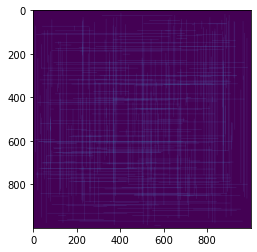

In [586]:
plt.imshow(grid)

In [588]:
(grid >= 2).sum()

7468

In [ ]:
#b

In [739]:
points

array([[130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130,
        130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130,
        130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130,
        130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130],
       [657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669,
        670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682,
        683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695,
        696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706]])

In [786]:
inp[0]

array([[593,  10],
       [593,  98]])

In [788]:
grid = np.zeros((1000,1000))

In [789]:
for p in inp: 
    #create the points 
    number_of_points= np.max(list((np.abs(p.T[1][0] - p.T[1][1]),np.abs(p.T[0][0] - p.T[0][1])))) + 1
    xs=np.linspace(p.T[0][0],p.T[0][1],number_of_points)
    ys=np.linspace(p.T[1][0],p.T[1][1],number_of_points)
    grid[xs.astype(int),ys.astype(int)] +=1

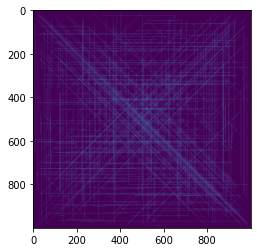

In [790]:
plt.imshow(grid)

In [791]:
(grid >= 2).sum()

22364

# 6

In [801]:
inp = open("inputs/input6.txt", "r+")
inp = inp.read()
inp = np.array(inp.split(",")).astype(int)

In [ ]:
#a brute force

In [961]:
current = inp
counter = [len(current)]
for x in range(80): 
    current = current -1
    bebe = np.where(current <0, True,False)
    new = sum(bebe)
    current[bebe] = 6
    current = np.append(current,[8]*new)
    counter.append(len(current))
len(current)

395627

In [ ]:
# b nice

In [962]:
counter = [0]
for x in range (0,9): 
    counter.append(len(np.where(inp == x)[0]))
counter = np.array(counter)
for x in range(256):
    counter = np.roll(counter,-1)
    counter[-1] = counter[0]
    counter[-3] += counter[0]
    counter[0] =  0 
sum(counter)

1767323539209

# 7

In [963]:
inp = open("inputs/input7.txt", "r+")
inp = inp.read()
inp = np.array(inp.split(",")).astype(int)

In [ ]:
#a

In [973]:
np.median(inp)

341.0

In [974]:
np.sum(np.abs(inp - 341))

344605

In [ ]:
#b

In [1016]:
def check(g):
    dist = np.abs(inp - g)
    scaled_dist = ((dist*(dist+1)) / 2)
    return sum(scaled_dist)

In [1018]:
distance = []
up = max(inp)
down = min(inp)
for x in range(down,up):
    distance.append(check(x))

In [1023]:
min(distance)

93699985.0

# 8

In [1050]:
inp = open("inputs/input8.txt", "r+")
inp = inp.read()
inp = inp.split("\n")
inp = [line.split(" | ") for line in inp]
inp = [[line.split(" ") for line in inpLine] for inpLine in inp]

In [ ]:
# a 

In [1056]:
out = [x[1] for x in inp]

In [1064]:
counter = 0
for x in out: 
    for instance in x: 
        if len(instance) == 2 or len(instance) == 3 or len(instance) == 4 or len(instance) == 7:
            counter +=1 

In [1065]:
counter

381

In [ ]:
# b 

In [ ]:
# 2 --> 2
# 3 --> 7
# 4 --> 4 
# 5 --> 2, 3 ,5 
# 6 --> 0, 6, 9
# 7 --> 8

In [1084]:
tester = [sorted(x) for x in inp[0][0]]

In [1099]:
decoding = {}
positions = {}
for x in ["a","b","c","d","e","f","g"]:
    positions[x] = None

In [1100]:
for x in range(len(tester)): 
    if len(tester[x]) == 2: 
        decoding[1] = tester[x]
    elif len(tester[x]) == 3: 
        decoding[7] = tester[x]
    elif len(tester[x]) == 4: 
        decoding[4] = tester[x]
    elif len(tester[x]) == 7: 
        decoding[8] = tester[x]

In [1104]:
for x in decoding[4]:
    if x not in decoding[1]:
        positions["a"] = x

In [1115]:
for x in tester:
    nine = True
    if len(x) != 6:
        pass
        nine = False
    else: 
        for y in set(decoding[4] + decoding[7]):
            if y not in x:
                nine = False
    if nine == True:
        nine = x
        break
for x in nine: 
    if x not in set(decoding[4] + decoding[7]):
        positions["g"] = x
decoding[9] = nine

In [1116]:
positions

{'a': 'd', 'b': None, 'c': None, 'd': None, 'e': None, 'f': None, 'g': 'a'}

In [1117]:
decoding

{8: ['a', 'b', 'c', 'd', 'e', 'f', 'g'],
 4: ['b', 'c', 'd', 'f'],
 1: ['c', 'f'],
 7: ['c', 'f', 'g'],
 9: ['a', 'b', 'c', 'd', 'f', 'g']}

In [1106]:
positions

{'a': 'd', 'b': None, 'c': None, 'd': None, 'e': None, 'f': None, 'g': None}

In [1071]:
np.where(len(inp[0][0]) == 2 )

(array([], dtype=int64),)

In [1077]:
for x in inp[0][0]:
 

['cfgeda',
 'afcbg',
 'fbcdaeg',
 'gbdfa',
 'fdgcba',
 'cbdf',
 'becga',
 'cf',
 'gcf',
 'gbdefa']

In [1073]:
 = np.where(len(inp[0][0]) ==2 )

SyntaxError: can't assign to literal (<ipython-input-1073-be3572498821>, line 1)

# 9

In [1535]:
inp = open("inputs/input9.txt", "r+")
inp = inp.read()
inp = inp.split("\n")
del inp[-1]
inp = np.array([list(x) for x in inp]).astype(int)

In [1536]:
#padding
padded = np.pad(inp,1, constant_values=np.inf)

In [1537]:
center = padded[1:101,1:101]

In [1538]:
up = padded[0:100,1:101]
down = padded[2:102,1:101]
left = padded[1:101,0:100]
right = padded[1:101,2:102]

In [1539]:
gradUP = np.where((center - up) < 0, True, False)
gradDO = np.where((center - down) < 0, True, False)
gradLE = np.where((center - left) < 0, True, False)
gradRI = np.where((center - right) < 0, True, False)

In [1540]:
sum(center[gradRI & gradUP & gradLE & gradDO] +1)

456

In [1658]:
# b

In [1791]:
basins = np.stack(np.where((gradRI & gradUP & gradLE & gradDO) == True)).T
group = np.zeros((100,100,2))
group[:,:,:] = np.nan

In [1792]:
def grow_basin(which):
    stack = []
    stack.append(which)
    group[which[0],which[1]] = which
    while len(stack) > 0: 
        current = stack.pop()
        
        if (current[1] < 99) and (current[0] < 99): 
            center = inp[current[0],current[1]]
            down = inp[current[0],current[1] + 1 ]
            up = inp[current[0],current[1] -1 ]
            left = inp[current[0] -1,current[1]]
            right = inp[current[0] +1,current[1]]
        elif (current[1] >= 99) and (current[0] >= 99): 
            center = inp[current[0],current[1]]
            down = inp[current[0],current[1]]
            up = inp[current[0],current[1] -1]
            left = inp[current[0] -1,current[1]]
            right = inp[current[0],current[1]]
        elif current[1] >= 99:
            center = inp[current[0],current[1]]
            down = inp[current[0],current[1]]
            up = inp[current[0],current[1] -1 ]
            left = inp[current[0] -1,current[1]]
            right = inp[current[0] +1,current[1]]
        elif current[0] >= 99:
            center = inp[current[0],current[1]]
            down = inp[current[0],current[1]+1]
            up = inp[current[0],current[1] -1 ]
            left = inp[current[0] -1,current[1]]
            right = inp[current[0],current[1]]
            

        if (down > center) & (down != 9) & (current[1] +1 < 100):
            if np.all(np.isnan(group[current[0],current[1]+1])):
                stack.append(current + np.array([0,1]))
                group[current[0],current[1]+1] = group[current[0], current[1]]
        if (up > center) & (up != 9)& (current[1] -1 >= 0):
            if np.all(np.isnan(group[current[0],current[1]-1])):
                stack.append(current + np.array([0,-1]))
                group[current[0],current[1]-1] = group[current[0], current[1]]
        if (left > center) & (left != 9) & (current[0] -1 >=0):
            if np.all(np.isnan(group[current[0]-1,current[1]])):
                stack.append(current + np.array([-1,0]))
                group[current[0]-1,current[1]] = group[current[0], current[1]]
        if (right > center) & (right != 9) & (current[0] +1 < 100):
            if np.all(np.isnan(group[current[0]+1,current[1]])):
                stack.append(current + np.array([1,0]))
                group[current[0]+1,current[1]] = group[current[0], current[1]]
    

In [1793]:
for x in basins:
    grow_basin(x)    

In [1794]:
np.where(((np.all(np.isnan(group),axis=2)==True) == (inp == 9)) == False) # Check if only 9s are still nan

(array([], dtype=int64), array([], dtype=int64))

In [1796]:
a = np.reshape(group,(10000,2))

In [1797]:
counter = {}
for x in a: 
    if str(x) in counter.keys():
        counter[str(x)] +=1
    else:
        counter[str(x)] =1

In [1798]:
a = sorted(counter, key=lambda k: counter[k])
a.reverse()

In [1803]:
counter[a[3]]

96

In [1804]:
counter[a[1]] * counter[a[2]] * counter[a[3]]

1047744

# 10

In [1519]:
inp = open("inputs/input10.txt", "r+")
inp = inp.read()
inp = inp.split("\n")
inp = [list(x) for x in inp]
del inp[-1]

In [1520]:
ends = [")",">","]","}"]
mapping = {"}": "{",")": "(","]": "[",">": "<"}
inv_map = {v: k for k, v in mapping.items()}

In [1521]:
def check_line(line):
    count = 0
    stack = []
    for x in line:
        if x not in ends: 
            stack.append(x)
        else:
            op = stack.pop()
            if op != mapping[x]:
                return x,count
        count+=1
    return False
    

In [1522]:
result = []
for line in inp: 
    result.append(check_line(line))

In [1523]:
#a

In [1524]:
out = []
for x in result:
    if x: 
        out.append(x[0])

In [1525]:
out.count(")") * 3  + out.count("]") * 57  + out.count("}") * 1197  +out.count(">") * 25137  

243939

In [1526]:
#b

In [1527]:
correct = []
for x in range(len(result)):
    if not result[x]:
        correct.append(inp[x])

In [1528]:
def complete_line(line):
    stack = []
    for x in line:
        if x not in ends: 
            stack.append(x)
        else:
            op = stack.pop()
    stack.reverse()
    return [inv_map[x] for x in stack]

In [1529]:
def calc_result(comp):
    score = 0
    for x in comp: 
        score = score * 5 
        if x == ")":
            score += 1
        elif x == "]":
            score += 2
        elif x == "}":
            score += 3
        elif x == ">":
            score += 4
        else:
            print("broken")
    return score

In [1530]:
completions = [complete_line(x) for x in correct]

In [1531]:
scores = [calc_result(x) for x in completions]

In [1532]:
scores = sorted(scores)

In [1534]:
scores[25]

2421222841

In [1533]:
len(scores)

51

# 11

In [173]:
inp = open("inputs/input11.txt", "r+")
inp = inp.read()
inp = inp.split("\n")
inp = np.array([list(x) for x in inp]).astype(int)

In [174]:
def raise_arround(x,y):
    if x > 0:
        start[x-1,y] += 1
    if x < (len(start) -1) :
        start[x+1,y] += 1
    if y > 0:
        start[x,y-1] += 1
    if y < (len(start) -1):
        start[x,y+1] += 1  
    if (x < (len(start) -1)) and (y < (len(start) -1)):
        start[x+1,y+1] += 1
    if (x > 0 ) and (y > 0 ):
        start[x-1,y-1 ] += 1
    if (x < (len(start) -1)) and (y > 0):
        start[x+1,y-1] += 1
    if (x > 0) and (y < (len(start) -1)):
        start[x-1,y+1] += 1

In [196]:
# step 2
def check_blink():
    current = np.where((start >= 10) & (~ blink))
    blink[current] = True
    for x in range(len(current[0])):
            raise_arround(current[0][x],current[1][x])
    if len(np.where((start >= 10) & (~ blink))[0]) > 0:
        check_blink()
    else:
        pass

In [202]:
start = inp.astype(int)
counter = 0
for x in range(500):
    blink = np.zeros(inp.shape).astype(bool)
    start = start + 1
    check_blink()
    counter += blink.sum()
    if blink.sum() == 100: 
        print(x)
    start[np.where(start >= 10)] = 0 
counter

323
333
343
353
363
373
383
393
403
413
423
433
443
453
463
473
483
493


6977

In [165]:
start

array([[1, 6, 5, 7, 0, 9, 7, 6, 6, 6],
       [1, 7, 6, 2, 4, 0, 9, 7, 6, 6],
       [1, 8, 9, 1, 3, 0, 0, 9, 7, 6],
       [8, 1, 1, 1, 2, 4, 0, 0, 9, 7],
       [1, 1, 1, 1, 1, 2, 6, 5, 0, 9],
       [6, 1, 1, 1, 1, 5, 3, 3, 4, 0],
       [4, 5, 7, 5, 4, 3, 2, 2, 3, 3],
       [3, 3, 4, 6, 2, 2, 2, 2, 2, 8],
       [4, 4, 3, 5, 8, 5, 4, 3, 8, 6],
       [0, 4, 3, 4, 0, 0, 0, 8, 6, 5]])

In [107]:
start

array([[  10,   10,    4,    5,   10,   10,   12,    8,   11,   11],
       [  13,   16,   10,   15,   11,   14,   20,   17,   22,   14],
       [   8,   16,   13,   12,   15,   17,   10,   18,   14,   10],
       [2946, 2945,   14,   14,   12,   18,   18,   11,   10,   10],
       [   9, 2943,   14,   10,   12,   13,   12,   13,    6,    7],
       [2946, 2943,   16,   14,   11,   13,   10,   13,   10,    5],
       [  11,   13,   17,   15,   15,   13,   14,   12,   14,    7],
       [  13,   19,   10,   10,    6,   10,   12,   10,   16,   14],
       [  13,   15,   18,   10,    4,    8,   11,   16,   14,   13],
       [   8,   12,   10,   10,    6,    5,   10,   15,   10,   10]])

In [15]:
inp == 9

array([[False, False, False, False, False, False,  True, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False,  True, False, False,  True, False, False,  True, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False,  True, False, False, False,  True, False,
        False],
       [False, False, False, False, False, False, False, False,  True,
        False],
       [False, False, False, False, False, False,  True, False, False,
         True],
       [ True, False,  True, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False,  True, False, False,
        False]])

In [144]:
np.where(inp == 9)

(array([], dtype=int64), array([], dtype=int64))

array([[8, 7, 2, 3, 7, 5, 9, 3, 2, 8],
       [8, 7, 2, 8, 3, 4, 8, 7, 8, 3],
       [3, 9, 6, 4, 9, 8, 2, 9, 4, 7],
       [8, 3, 2, 5, 4, 7, 8, 2, 4, 6],
       [2, 6, 4, 4, 4, 7, 6, 7, 2, 5],
       [7, 3, 6, 9, 2, 8, 3, 9, 7, 3],
       [6, 4, 8, 8, 7, 8, 6, 6, 9, 4],
       [6, 7, 2, 4, 3, 7, 9, 3, 8, 9],
       [9, 4, 9, 2, 2, 4, 5, 5, 7, 6],
       [4, 5, 5, 6, 5, 3, 9, 8, 4, 4]])

# 12

In [582]:
# Function to build the graph
def build_graph(edges):
    graph = defaultdict(list)
    # Loop to iterate over every
    # edge of the graph
    for edge in edges:
        a, b = edge[0], edge[1]
         
        # Creating the graph
        # as adjacency list
        graph[a].append(b)
        graph[b].append(a)
    return graph

In [583]:
def printAllPathsUtil(u, d):
    #global double
    global counter 

    # Mark the current node as visited and store in path
    if unique[u]: 
        visited[u]= True
    path.append(u)

    # If current vertex is same as destination, then print
    # current path[]
    if u == d:
        counter +=1
        collection.append(path)
    else:
        # If current vertex is not destination
        # Recur for all the vertices adjacent to this vertex
        for i in graph[u]:
            if visited[i] == False:
                printAllPathsUtil(i, d)
            #elif visited[i] == True:
                #double = i
                #printAllPathsUtil(i, d)


    # Remove current vertex from path[] and mark it as unvisited
    path.pop()
    visited[u]= False
    #if double == u: 
     #   double = False

In [607]:
inp = open("inputs/input12.txt", "r+")
inp = inp.read()
inp = inp.split("\n")
inp = [x.split("-")  for x in inp]

In [608]:
graph = build_graph(inp)

In [586]:
#a

In [587]:
visited = copy.deepcopy(graph)
for x in visited.keys():
    visited[x] = False

In [588]:
unique = copy.deepcopy(graph)
for x in unique.keys():
    if x.isupper():
        unique[x] = False 
    else:
        unique[x] = True

In [589]:
# The Search
path = []
collection = []
counter = 0
printAllPathsUtil("start", "end")

In [590]:
counter

19

In [ ]:
# b 

In [638]:
inp = open("inputs/input12.txt", "r+")
inp = inp.read()
inp = inp.split("\n")
inp = [x.split("-")  for x in inp]

In [639]:
graph = build_graph(inp)

In [640]:
visited = copy.deepcopy(graph)
for x in visited.keys():
    visited[x] = False

In [641]:
unique = copy.deepcopy(graph)
for x in unique.keys():
    if x.isupper():
        unique[x] = False 
    else:
        unique[x] = True

In [642]:
def printAllPathsUtil(u, d):
    global double
    global counter 
    
    if unique[u]: 
        visited[u]= True
    path.append(u)

    if u == d:
        counter +=1
    else:

        for i in graph[u]:
            if visited[i] == False:
                printAllPathsUtil(i, d)
            
            elif (visited[i] == True) and (not double) and (i != "start") and (i != "end")  :
                double = i
                printAllPathsUtil(i, d)
    

    # Remove current vertex from path[] and mark it as unvisited
    path.pop()
    if double == u: 
        double = False
    else:
        visited[u]= False

In [643]:
# The Search
path = []
collection = []
counter = 0
double = False
printAllPathsUtil("start", "end")
counter

120506

# 13

In [11]:
inp = open("inputs/input13.txt", "r+")
inp = inp.read()
inp = inp.split("\n")

In [64]:
paper = np.array([x.split(",") for x in inp[:750]]).astype(int)
a = np.zeros(paper.max(axis=0)+1)
for x in paper: 
    a[x[0],x[1]] = 1
paper = a

In [17]:
instr = [[y[0][-1],y[1]] for y in [x.split("=") for x in inp[751:]]]

In [35]:
#a 
#split on 655
up = paper[:655,:]
down = paper[656:,:]

In [53]:
mirror = np.flip(np.flip(down),1)

In [68]:
np.logical_or(up, mirror).sum()

610

In [61]:
#b

In [80]:
current = paper 
for x in instr:
    print(x)
    line = int(x[1])
    if x[0] == "x":
        line = int(x[1])
        up = current[:line,:]
        down = current[line+1:,:]
        mirror = np.flip(np.flip(down),1)
        current = np.logical_or(up, mirror)
    else:
        up = current[:,:line]
        down = current[:,line+1:]
        mirror = np.flip(down,1)
        current = np.logical_or(up, mirror)

['x', '655']
['y', '447']
['x', '327']
['y', '223']
['x', '163']
['y', '111']
['x', '81']
['y', '55']
['x', '40']
['y', '27']
['y', '13']
['y', '6']


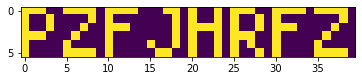

In [83]:
plt.imshow(current.T)

# 14

In [545]:
inp = open("inputs/input14.txt", "r+")
inp = inp.read()
inp = inp.split("\n")

In [546]:
start = inp[0]

In [547]:
rules = [x.split(" -> ") for x in inp[2:]]

In [548]:
def deconstruct():
    window = []
    for x in range (len(current)):
        window.append(current[x:x+2])
    return window

In [549]:
def add(window):
    for x in rules: 
        match = [index for index, element in enumerate(window) if element == x[0]]
        for y in match:
            window[y] = window[y][0] + x[1] + window[y][1]
    return window

In [550]:
def rebuild(window):
    rebuild = []
    for x in window:
        if len(x) == 1: 
            rebuild.append(x)
        else:
            rebuild.append(x[:-1])
    rebuild = "".join(rebuild)
    return rebuild

In [551]:
current = start
for x in range(10):
    window = deconstruct()
    window  = add(window)
    current = rebuild(window)

In [552]:
count = {}
for x in current: 
    if x in count.keys():
        count[x] += 1
    else:
        count[x] = 1

In [553]:
#b

In [554]:
current = start
current = deconstruct()

In [555]:
combos = {}
ruleDict = {}
added = {}

In [556]:
for x in rules: 
    combos[x[0]] = 0
    ruleDict[x[0]] = x[1]

In [557]:
for x in set(np.array(rules).T[1]):
    added[x] = 0
for x in start: 
    added[x] += 1

In [558]:
for x in current:
    if len(x) > 1:
        combos[x] += 1

In [559]:
combos.keys() == ruleDict.keys()

True

In [560]:
def step():
    intermediate = copy.deepcopy(combos)
    for x in intermediate.keys():
        if intermediate[x] > 0: 
                front = x[0] + ruleDict[x]
                back =  ruleDict[x] + x[1]
                combos[front] += intermediate[x]
                combos[back] += intermediate[x]
                combos[x] -= intermediate[x]  
                added[ruleDict[x]] += intermediate[x]

In [561]:
for x in range(40): 
    step()

In [562]:
inv_map = {v: k for k, v in added.items()}

In [563]:
added[inv_map[max(inv_map.keys())]] - added[inv_map[min(inv_map.keys())]]

3906445077999

In [520]:
added[inv_map[min(inv_map.keys())]]

3849876073

In [521]:
added[inv_map[max(inv_map.keys())]]

2192039569602

# 15

In [739]:
def shortest(x,y):
    if (x == 0) and (y == 0): 
        shortestPaths[0,0] = 1
    elif x == 0 and y != 0: 
        shortest(0,y-1)
        shortestPaths[0,y] = shortestPaths[0,y-1] + inp[x,y]
        
    elif x != 0 and y == 0: 
        shortest(x-1,0)
        shortestPaths[x,0] = shortestPaths[x-1,0] + inp[x,y]
    else:
        shortest(x,y-1) 
        shortest(x-1,y)
        top = shortestPaths[x,y-1] + inp[x,y]
        left = shortestPaths[x-1,y] + inp[x,y]
        shortestPaths[x,y] = (min(top,left))
        return (min(top,left))

In [740]:
def shortest(x,y):
    if (x == 0) and (y == 0): 
        return 0
    elif x == 0 and y != 0: 
        return shortest(0,y-1) + inp[x,y]
    elif x != 0 and y == 0: 
        return shortest(x-1,0) + inp[x,y]
    else:
        return min(shortest(x,y-1)+ inp[x,y],shortest(x-1,y) + inp[x,y])

In [737]:
shortestPaths = np.zeros(inp.shape)
shortestPaths[:,:] = np.inf

In [870]:
visited = np.zeros(inp.shape)
q = []

In [872]:
bfs(visited,inp,0,0)

KeyboardInterrupt: 

In [891]:
def bfs(visited,inp,startX,startY): 
    visited[startX,startY] = 0
    q.append((startX,startY))
    while q:
        s = q.pop()
        x  = s[0]
        y = s[1]
        if y+1 < 100: 
            path = visited[x,y] + inp[x,y+1]
            if visited[x,y+1] == 0:
                visited[x,y+1]  = path
            elif path < visited[x,y+1] and visited[x,y+1] > 0: 
                visited[x,y+1]  = path
            q.append((x,y+1))
        if x+1 < 100: 
            path = visited[x,y] + inp[x+1,y]
            if visited[x+1,y] == 0:
                visited[x+1,y]  = path
            if path < visited[x+1,y] and visited[x+1,y] > 0: 
                visited[x+1,y]  = path
            q.append((x+1,y))  

In [1016]:
inp = open("inputs/input15.txt", "r+")
inp = inp.read()
inp = inp.split("\n")
inp = np.array([list(x) for x in inp]).astype(int)

In [1017]:
def dijkstra(inp, x = 0 ,y = 0):
    
    
    visited = np.zeros(inp.shape)
    distance = np.zeros(inp.shape)
    distance[:,:] = np.inf
    distance[0,0] = 0

    pq = PriorityQueue()
    pq.put((0,x,y))

    while not pq.empty():
        dist,x,y = pq.get()
        visited[x,y] = True

        if x < (inp.shape[0]-1):
            right = distance[x+1,y]
            if not visited[x+1,y]:
                old = distance[x+1,y]
                new = distance[x,y] + inp[x+1,y]
                if new < old: 
                    pq.put((new, x+1, y))
                    distance[x+1,y] = new
        if y < (inp.shape[1]-1):
            right = distance[x,y+1]
            if not visited[x,y+1]:
                old = distance[x,y+1]
                new = distance[x,y] + inp[x,y+1]
                if new < old: 
                    pq.put((new, x, y+1))
                    distance[x,y+1] = new
                    
        if x > 0:
            right = distance[x-1,y]
            if not visited[x-1,y]:
                old = distance[x-1,y]
                new = distance[x,y] + inp[x-1,y]
                if new < old: 
                    pq.put((new, x-1, y))
                    distance[x-1,y] = new
        if  y > 0 :
            right = distance[x,y-1]
            if not visited[x,y-1]:
                old = distance[x,y-1]
                new = distance[x,y] + inp[x,y-1]
                if new < old: 
                    pq.put((new, x, y-1))
                    distance[x,y-1] = new
                    
    return visited, distance

In [1018]:
vis, dis = dijkstra(inp)

In [1019]:
dis

array([[  0.,   4.,  11., ..., 373., 378., 386.],
       [  7.,   6.,   7., ..., 368., 371., 379.],
       [  9.,  15.,  13., ..., 374., 373., 374.],
       ...,
       [393., 384., 392., ..., 517., 519., 518.],
       [397., 393., 398., ..., 518., 526., 526.],
       [405., 400., 407., ..., 519., 527., 527.]])

In [1020]:
#b 
def tile(inp): 
    inp = inp +1
    inp[inp == 10] = 1
    return inp

In [1021]:
current = inp
stack = [inp]
for x in range(4):
    current = tile(current)
    stack.append(current)
box = []
for y in stack: 
    current = y
    stack = [y]
    for x in range(4):
        current = tile(current)
        stack.append(current)
    box.append(np.concatenate(stack))
box = np.concatenate(box,axis=1)

In [1022]:
start_time = time.time()
vis, dis = dijkstra(box)
print("--- %s seconds ---" % (time.time() - start_time))

--- 1.800626277923584 seconds ---


# 16

In [101]:
inp = open("inputs/input16.txt", "r+")
inp = inp.read()

In [118]:
inp = "EE00D40C823060"

In [119]:
binCode = [bin(int(x,16))[2:] for x in inp]
for x in range(len(binCode)):
    if binCode[x] == "0":
        binCode[x] = "0000"
    elif len(binCode[x]) != 4: 
        binCode[x] = "0" * (4 - len(binCode[x])) + binCode[x]
        
string = "".join(binCode)

In [120]:
def decode_literal(inp,pointer):
    out = []
    while True: 
        if inp[pointer] == "1": 
            out.append(inp[pointer+1:pointer+5])
            pointer += 5
        else:
            out.append(inp[pointer+1:pointer+5])
            return int("".join(out),2), pointer+5

In [121]:
def decode_15(inp):
    length = int(inp[:15],2)
    print(length)
    packages = []
    pointer = 0
    while pointer < length - 5:
        print(pointer)
        package, pointer = decode_literal(inp[15:],pointer)
        print(package)
        packages.append(package)
    return packages

In [122]:
def decode_11(inp):
    n = int(inp[:11],2)
    return n

In [123]:
# decode full: 
def read(inp):
    out = []
    inp = string
    header = int(inp[:3],2)
    packetID = int(inp[3:6],2)
    if packetID == 4:
        return decode_literal(inp[6:],0)[0]
    else:
        if inp[6] == 0:
            out =  decode_15(inp[7:])
        else:
            out =  decode_11(inp[7:])
    return out

In [124]:
read(string)

3

In [ ]:
full
header = [:3] event
id = [3:6]
if id == 4: 
    return decode_literal(inp[6:])
else:
    type = [6]
    if type == 0:
        decode_15(inp[7:]
        
    if type == 1: 
        decode_11(inp[7:]
    

In [99]:
decode_15(string[7:])

27
0
165
10
5
15
4
20
9


[165, 5, 4, 9]

In [ ]:
000000000011011

In [82]:
int("000000000011011",2)

27

In [10]:
import binascii

binary_string = binascii.unhexlify(inp)

In [15]:
bin(binary_string)

TypeError: 'bytes' object cannot be interpreted as an integer

# 17

In [1023]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

In [1119]:
x= [207, 263]
y=[-115, -63]

In [1120]:
def step(position,vel):
    position[0] += vel[0]
    position[1] += vel[1]
    if vel[0] > 0: 
        vel[0] -= 1
    if vel[0] < 0: 
        vel[0] += 1
    vel[1] -= 1
    return position, vel

In [1121]:
def check(position, x,y):
    if position[0] >= x[0] and position[0] <= x[1]:
        if position[1] <= y[1] and position[1] >= y[0]:
            return True
    return False

In [1122]:
def out(position, x,y):
    if position[0] > x[1] or position[1] < y[0]: 
        return True
    return False

In [1123]:
def check_sum(n):
    return  (n / 2) * (n + 1)

In [1132]:
# analytic solution: 
# x doesnt matter
# y is garantueed to come out at 0 so since max y = -115 -->
check_sum(114)

6555.0

In [1127]:
check_sum(114)

6555.0

In [1125]:
#b

In [1189]:
x= [207, 263]
y=[-115, -63]
start = [0,0]

In [1181]:
x= [20,30]
y= [-10, -5]
start = [0,0]

In [1192]:
possibleXV = []
# which b work: 
for v in range(0,264):
    pos = [0,0]
    vel = v
    while not out(pos,x,y):
        pos[0] += vel
        vel = max(vel-1,0)
        if pos[0] >= x[0] and pos[0] <= x[1]:
            possibleXV.append(v)
            break
        elif vel == 0: 
            break

In [1193]:
possible = []
for xV in possibleXV: 
    for yV in range(-200, 200):
        pos = [0,0]
        vel = [xV,yV]
        while not out(pos,x,y):
            pos, vel = step(pos, vel)
            result = check(pos, x,y)
            if result:
                possible.append([xV,yV])
                break

In [1194]:
len(possible)

4973

# 18

In [43]:
def depth(seq):
    for level in count():
        if not seq:
            return level
        seq = list(chain.from_iterable(s for s in seq if isinstance(s, Sequence)))

In [126]:
inp = open("inputs/input18.txt", "r+")
inp = inp.read()
inp = inp.split("\n")
#import ast
#inp = [ast.literal_eval(x) for x in inp]
#from collections import Sequence
#from itertools import chain, count
import re
original = inp
inp = [x.replace("[", "O") for x in inp]
inp = [x.replace("]", "C") for x in inp]

In [128]:
original[0]

'[[[[2,2],7],[[9,2],[5,2]]],[4,[[8,9],9]]]'

In [135]:
inp[0]

'OOOO2,2C,7C,OO9,2C,O5,2CCC,O4,OO8,9C,9CCC'

In [155]:
a = 'O.,O'
b = 'C,.C'

In [153]:
"C,9C" in inp[0]

True

In [161]:
matches = re.findall(b, inp[0])
for x in matches: 
    print(inp[0].index(x))

7
35


In [ ]:
inp[0].index()

In [77]:
def get_all_literals(inp):
    # either [[3,5],5], [5, [3,5]]
    for x in

SyntaxError: unexpected EOF while parsing (<ipython-input-77-f995c226ea68>, line 1)

In [75]:
depth = get_depth_list(inp[0])
explode = depth.index(max(depth))

In [76]:
    inp[0][explode:explode+5]

'[2,2]'

In [63]:
len(inp[0])

41

In [73]:
inp[0][3:3+5]

'[2,2]'

In [48]:
depth(L)

5

# 19

# 20

In [525]:
import numpy as np
inp = open("inputs/input20.txt", "r+")
inp = inp.read()
inp = inp.split("\n")
for x in range(len(inp)):
    inp[x] = inp[x].replace("#", "1")
    inp[x] = inp[x].replace(".", "0")
alg = list(inp[0])
img = np.array([list(x) for x in inp[2:]]).astype(int)

In [526]:
img = np.pad(img,110)

In [527]:
def convolve_1(img):
    img = np.pad(img,1)
    out = np.zeros((img.shape[0]-2,img.shape[1]-2))
    out[:,:] = np.nan
    for x in range(1,img.shape[0]-1):
        for y in range(1, img.shape[1]-1):
            a = img[x-1:x+2, y-1:y+2]
            b = a.flatten()
            c = int("".join(list(b.astype(str))),2)
            d = int(alg[c])
            out[x-1,y-1] = d
    return out.astype(int)

In [528]:
a = img
for x in range(50):
    a = convolve_1(a)
    

(320, 320)

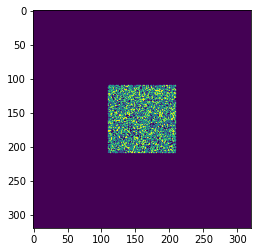

In [530]:
plt.imshow(img)
img.shape

(320, 320)

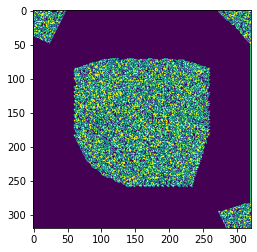

In [531]:
plt.imshow(a)
a.shape

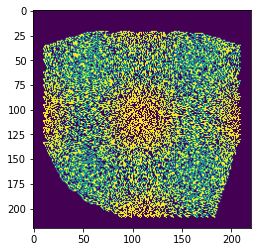

In [533]:
plt.imshow(a[50:-50,50:-50])

In [534]:
a[50:-50,50:-50].sum()

17325

In [471]:
b[2:-2,2:-2].sum()

5419

In [64]:
import numpy as np
p1 = 4
p2 = 6
p1S = 0 
p2S = 0
dice = np.arange(1,101)
dice = np.concatenate([dice]*20)
pointer = 0

In [65]:
while p1S < 1000 and p2S < 1000: 
    
    roll1 = dice[pointer:pointer+3]
    roll2 = dice[pointer+3: pointer +6]
    p1 += sum(roll1)
    p2 += sum(roll2)
    if (p1 % 10) == 0. : 
        p1 = 10
    else:
        p1 = p1 %10
        
    if (p2 % 10) == 0. : 
        p2 = 10
    else:
        p2 = p2 %10
    p1S += p1
    if p1S >=1000:
        pointer +=3
        break
    p2S += p2
    pointer += 6
print(pointer,p1S,p2S)

993 1000 895


In [69]:
#b 

31381059609

In [34]:
import numpy as np
p1 = 4
p2 = 8
p1S = 0 
p2S = 0

In [36]:
def roll(p,pS):
    p += np.random.randint(1,4)
    if (p % 10) == 0. : 
        p = 10
    else:
        p = p %10 
    pS += p
    return p, pS

In [3]:
univ = 341960390180808 + 444356092776315

In [4]:
    roll1 = dice[pointer:pointer+3]
    roll2 = dice[pointer+3: pointer +6]
    


SyntaxError: invalid syntax (<ipython-input-4-77e3bfcf3282>, line 4)

3

In [16]:
363 * 362

131406

# 22

In [1]:
import numpy as np
inp = open("inputs/input22.txt", "r+")
inp = inp.read()
inp = inp.split("\n")

In [2]:
inp = [x.split(",") for x in inp]

In [3]:
turn = [x[0].split(" ")[0] for x in inp]

In [4]:
turn = [x.replace("on", "1") for x in turn]
turn = [x.replace("off", "0") for x in turn]
turn = np.array(turn).astype(bool)

In [5]:
coords = [[x[0].split(" ")[1], x[1], x[2]] for x in inp]
coords = [[x[0].replace("x=", "").split(" ")[1], x[1].replace("y=", ""), x[2].replace("z=", "")] for x in inp]
coords = np.array([[x[0].split(".."),x[1].split(".."),x[2].split("..")] for x in coords]).astype(int)
coords = coords + 50

In [6]:
#a

In [7]:
cube = np.zeros((101,101,101)).astype(bool)

In [8]:
for step in range(len(turn)):
    x = coords[step][0] 
    y = coords[step][1]
    z = coords[step][2]
    if np.all(np.abs(coords[step]) == coords[step]):
        cube[x[0]:x[1]+1, y[0]:y[1]+1, z[0]:z[1]+1] = turn[step]

In [9]:
cube.sum()

474140

In [163]:
# b

In [32]:
X = np.zeros((coords.max(axis=0).T[0][0] + np.abs(coords.min(axis=0).T[0][0])))
Y = np.zeros((coords.max(axis=0).T[0][1] + np.abs(coords.min(axis=0).T[0][1])))
Z = np.zeros((coords.max(axis=0).T[0][2] + np.abs(coords.min(axis=0).T[0][2])))

In [36]:
for step in range(len(turn)):
    x = coords[step][0] + np.abs(coords.min(axis=0).T[0][0])
    y = coords[step][1] + np.abs(coords.min(axis=0).T[0][1])
    z = coords[step][2] + np.abs(coords.min(axis=0).T[0][2])
    X[x[0]:x[1]+1] = turn[step]
    Y[y[0]:y[1]+1] = turn[step]
    Z[z[0]:z[1]+1] = turn[step]
# NO. :)

In [39]:
# Idea. Just somehow save a range
X = 
Y =
Z =


175794

In [46]:
coords[0]

array([[45, 97],
       [19, 72],
       [31, 83]])

In [47]:
coords[1]

array([[ 6, 55],
       [23, 71],
       [36, 85]])

In [18]:
2758514936282235

175794

# 23

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import copy

In [3]:
def check_win(field): 
    if np.all(field.T[2] == [0,1,1,1,1]):
        if np.all(field.T[4] == [0,2,2,2,2]):
            if np.all(field.T[6] == [0,3,3,3,3]):
                if np.all(field.T[8] == [0,4,4,4,4]):
                    return True
    return False

In [157]:
def move(start, end, field):
    count = 0
    if field[end] != 0: 
        return False
    if field[start] <= 0:
        return False
    
    if start[0] == 0: 
        # move from top to row: 
        if start[1] > end[1]:
            moves = np.arange(end[1],start[1])
        else:
            moves = np.arange(start[1]+1, end[1]+1)
        for x in moves: 
            count +=1
            if field[start[0],x] != 0:
                return False
        moves = np.arange(start[0]+1, end[0]+1)
        for x in moves: 
            count +=1
            if field[x,end[1]] != 0: 
                return False
    else: 
        # for move from room: 
        moves = np.arange(0, start[0])
        for x in moves: 
            count +=1
            if field[x,start[1]] != 0: 
                return False
        if start[1] > end[1]:
            moves = np.arange(end[1],start[1])
        else:
            moves = np.arange(start[1]+1, end[1]+1)
        for x in moves: 
            count +=1
            if field[0, x] != 0: 
                return False
        moves = np.arange(1, end[0]+1)
        for x in moves: 
            count +=1
            if field[x,end[1]] != 0: 
                return False
            
    field[end] = field[start]
    field[start] = 0
    if field[end] == 1: 
        return (count * 1, field)
    if field[end] == 2: 
        return (count * 10, field)
    if field[end] == 3: 
        return (count * 100, field)
    if field[end] == 4: 
        return (count * 1000, field)
    print("BROKEN")

In [158]:
def run_moves(moves): 
    completeCost = [0]
    field = copy.deepcopy(base)
    animation = []
    animation.append(copy.deepcopy(base))
    for x in moves: 
        res = move(tuple(x[0]), tuple(x[1]),field)
        if res:
            field = res[1]
            completeCost.append(res[0])
            animation.append(copy.deepcopy(field))
        else: 
            return False, completeCost, animation
    print("Path complete")
    return check_win(field), completeCost, animation

In [159]:
def mutate(moves): 
    
    #swap random steps:
    mutate = (np.random.rand(len(moves)) > 0.5).T
    swap = moves[mutate]
    order = np.arange(0,len(swap))
    swap = swap[order]
    moves[mutate] = swap
    
    # add length
    if np.random.rand(1) > 0.5: 
        moves = np.concatenate((moves,np.random.randint(0,5,(1,2,2))))
    if moves.shape[0] > 32: # so it converges to arround 25
            moves = moves[1:,:,:]
    
    # change coordinates
    mutate = (np.random.rand(2,len(moves)) > 0.5).T
    new = np.random.randint(0,5, (mutate.sum(),2))
    moves[mutate] = new     
    return moves
    

In [160]:
base = np.array([
[0,0,0,0,0,0,0,0,0,0,0],
[-1,-1,3,-1,2,-1,4,-1,1,-1,-1],
[-1,-1,4,-1,3,-1,2,-1,1,-1,-1],
[-1,-1,4,-1,2,-1,1,-1,3,-1,-1],
[-1,-1,2,-1,4,-1,1,-1,3,-1,-1]])

In [161]:
#############
#...........#
###C#B#D#A###
  #D#C#B#A#
  #D#B#A#C#
  #B#D#A#C#
  #########

In [162]:
basePath = [[(1,2),(0,0)],
            [(2,2),(0,10)],
            [(3,2),(0,9)],
            [(4,2),(0,1)],
            [(1,8),(4,2)], 
            [(2,8),(3,2)],
            
            [(3,8),(0,3)],
            [(4,8),(0,5)],
            [(0,9),(4,8)],
            [(0,10),(3,8)], 
            [(1,6),(2,8)],

            [(2,6),(0,10)],
            [(3,6),(0,9)],
            [(4,6),(0,7)],
            [(0,5),(4,6)], 
            [(0,3),(3,6)],
            
            [(0,7),(2,2)],
            [(0,9),(1,2)],
            [(1,4),(0,3)],
            [(2,4),(2,6)], 
            [(3,4),(0,9)],
            
            [(4,4),(1,8)],
            [(0,3),(4,4)],
            [(0,9),(3,4)],
            [(0,1),(2,4)], 
            [(0,0),(1,6)],
            [(0,10),(1,4)],
           ]

In [163]:
res =  run_moves(basePath)

Path complete


In [167]:
sum(res[1])

48708

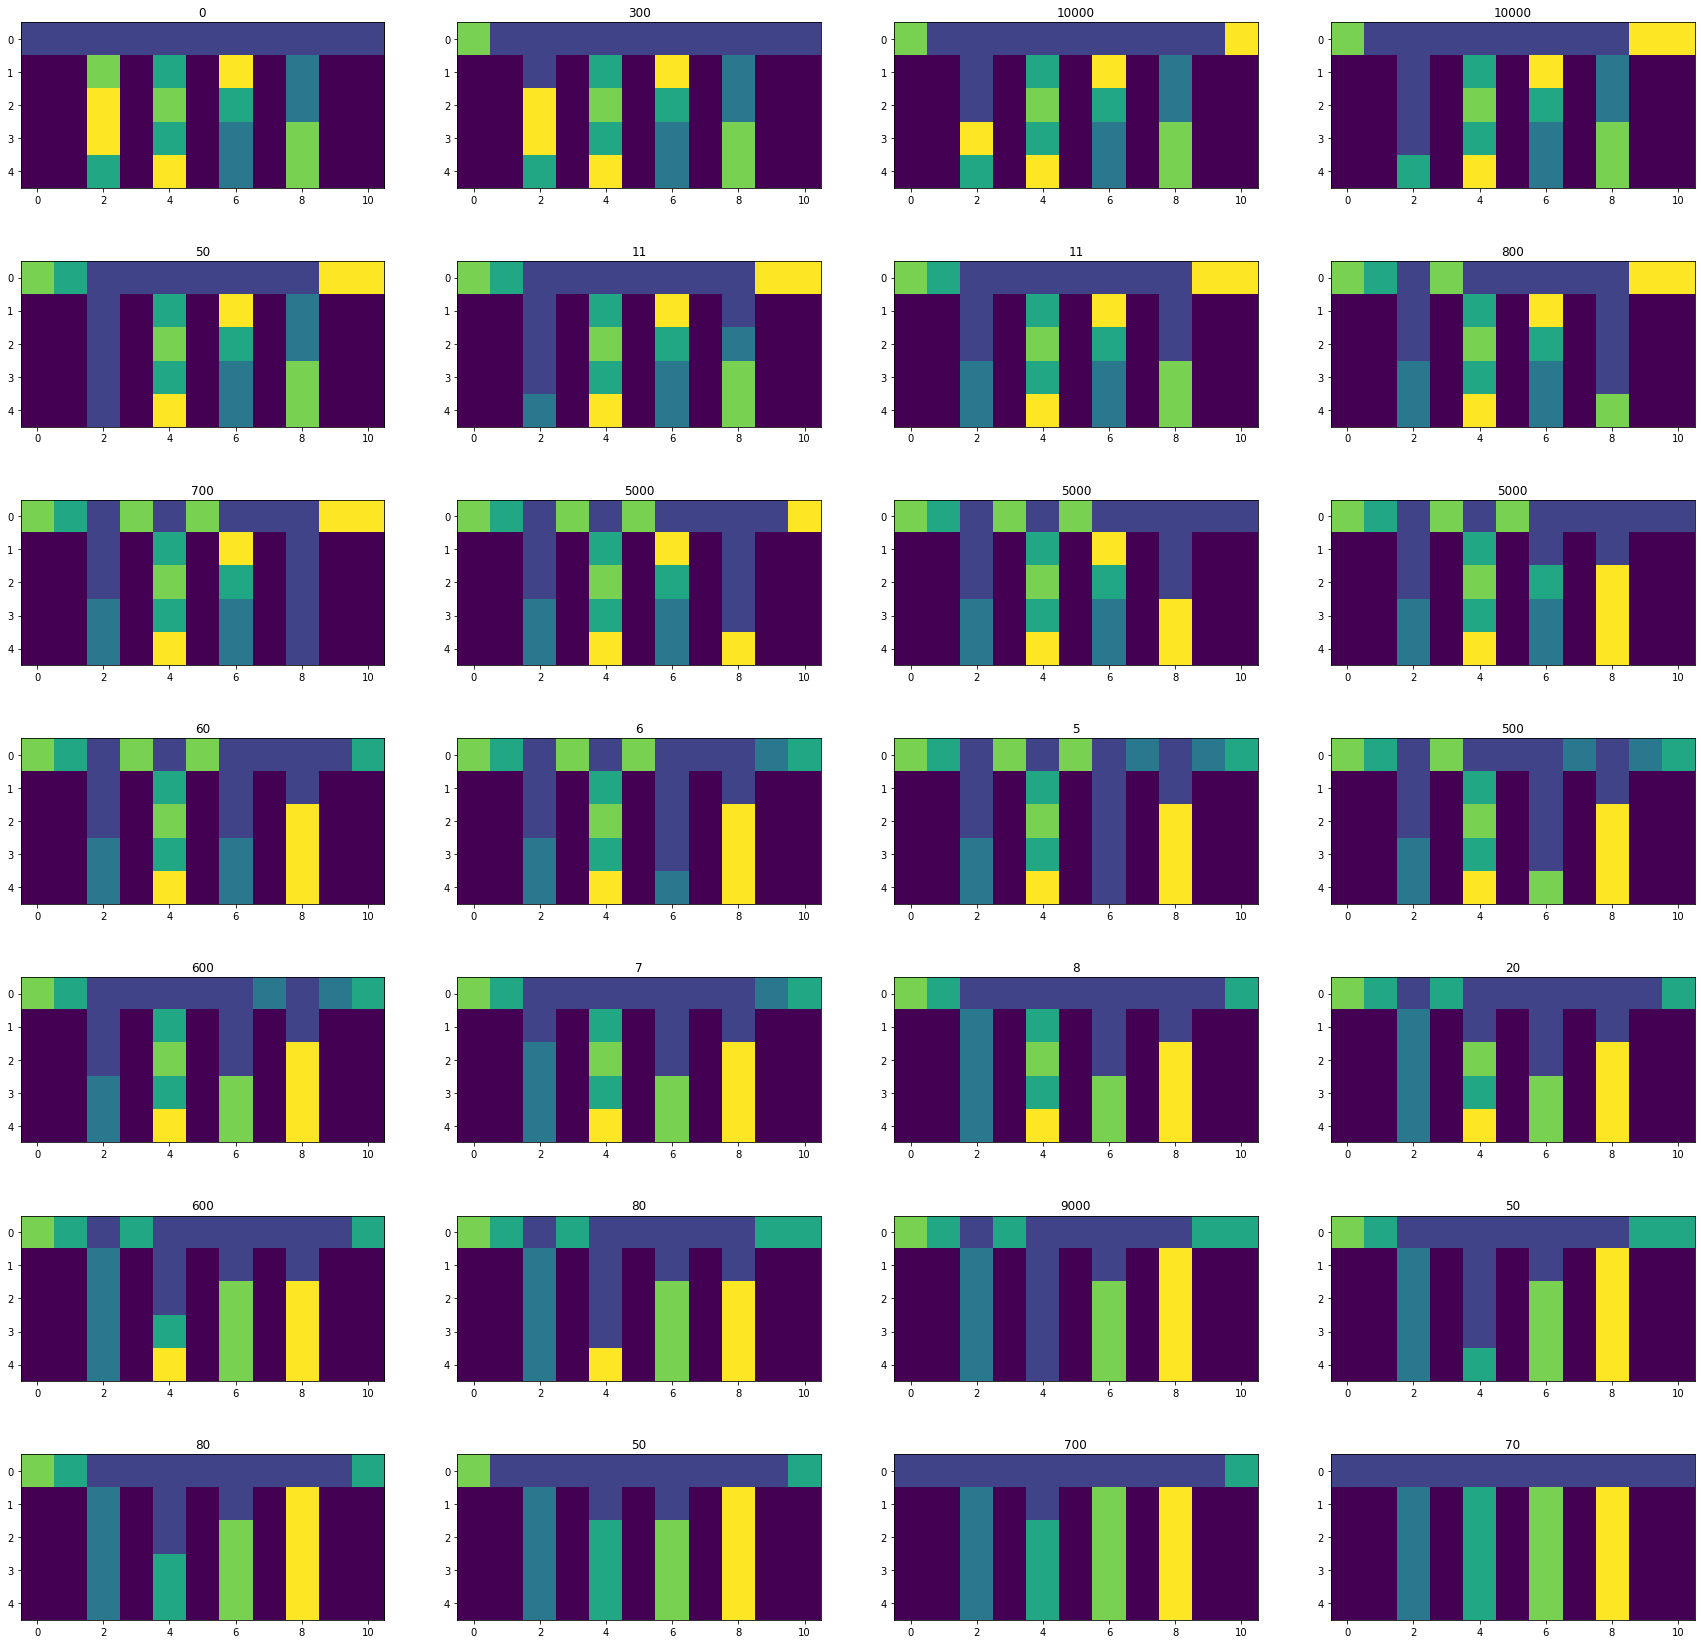

In [165]:
# using the variable axs for multiple Axes
fig, axs = plt.subplots(7, 4, figsize=(30,30))
count = 0
yAxis = 0
for x in range(len(res[2])):
    axs[yAxis,count].imshow(res[2][x])
    axs[yAxis,count].set_title(res[1][x])
    count +=1
    if count % 4 == 0 and count != 0: 
        count = 0 
        yAxis += 1 

# 24

In [33]:
import numpy as np
import math
inp = open("inputs/input24.txt", "r+")
inp = inp.read()
inp = inp.split("\n")

In [37]:
inp[1].split()

['mul', 'x', '0']

In [13]:
class ALU:
    def __init__(self):
        self.store = [None,None,None,None]
    def inp(self,inp,where):
        self.store[where] = inp
    def add(self,ind1, ind2):
        self.store[ind1] = self.store[ind1] + self.store[ind2]
    def mul(self,ind1, ind2):
        self.store[ind1] = self.store[ind1] * self.store[ind2]
    def div(self,ind1, ind2):
        self.store[ind1] = self.store[ind1] // self.store[ind2]
    def mod(self,ind1, ind2):
        self.store[ind1] = self.store[ind1] % self.store[ind2]
    def eql(self,ind1, ind2):
        self.store[ind1] = 1 if self.store[ind1] == self.store[ind2] else 0
    
    def parse_command(self,command): 
        command.split([0])

In [17]:
A = ALU()

# 25

In [272]:
import numpy as np
inp = open("inputs/input25.txt", "r+")
inp = inp.read()
inp = inp.split("\n")
inp = [x.replace("v", "1") for x in inp]
inp = [x.replace(">", "2") for x in inp]
inp = [x.replace(".", "0") for x in inp]
base = np.array([list(x) for x in inp]).astype(int)

In [273]:
def move_east():
    east = np.where(inp==2)
    nex = east[1] + 1
    nex[nex == inp.shape[1]] = 0
    nex = (east[0], nex)
    empty = (inp[nex] == 0)
    move = (east[0][empty], east[1][empty])
    to = (nex[0][empty], nex[1][empty])
    inp[move] = 0 
    inp[to] = 2

In [274]:
def move_south():
    south = np.where(inp==1)
    nex = south[0] + 1
    nex[nex == inp.shape[0]] = 0
    nex = (nex, south[1])
    move = (south[0][inp[nex] == 0], south[1][inp[nex] == 0])
    to = (nex[0][inp[nex] == 0], nex[1][inp[nex] == 0])
    inp[move] = 0 
    inp[to] = 1

In [275]:
inp = copy.deepcopy(base)
count = 0

In [276]:
while True: 
    saved = copy.deepcopy(inp)
    move_east()
    move_south()
    count +=1
    if np.all(saved == inp): 
        break

In [277]:
count

380

In [261]:
move_south()

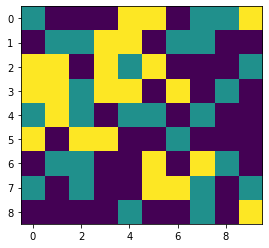

In [260]:
plt.imshow(base)

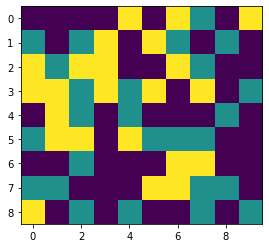

In [268]:
plt.imshow(inp)

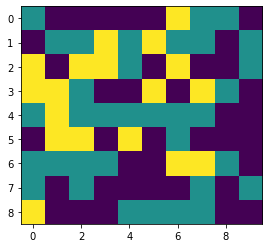

In [262]:
plt.imshow(inp)

In [185]:
east[0] = east[0]+1

TypeError: can only concatenate tuple (not "int") to tuple

In [186]:
east

(array([0, 0, 0, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 5, 5, 5, 6, 6, 7, 7,
        8], dtype=int64),
 array([4, 5, 9, 3, 4, 0, 1, 3, 5, 0, 1, 3, 4, 6, 1, 0, 2, 3, 5, 7, 5, 6,
        9], dtype=int64))